# Libraries

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [75]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 3.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Part 1

In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('Tips.xlsx')

,Name,Surname,total_bill,tip,sex,smoker,day,time,size
0,Adele,Groves,16.99,1.01,Female,No,Sun,Dinner,2
1,Josh,Wilson,10.34,1.66,Male,No,Sun,Dinner,3
2,NaN,Morrison,21.01,3.50,Male,No,Sun,Dinner,3
3,Harvey,Kennedy,23.68,3.31,Male,No,Sun,Dinner,2
4,NaN,Webb,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Display the first 8 rows
print("First 8 rows:")
print(df.head(8))

# Display the last 4 rows
print("\nLast 4 rows:")
print(df.tail(4))

# Show the number of observations (rows)
print(f"\nNumber of observations: {df.shape[0]}")

First 8 rows:
      Name   Surname  total_bill   tip     sex smoker  day    time  size
0    Adele    Groves       16.99  1.01  Female     No  Sun  Dinner     2
1     Josh    Wilson       10.34  1.66    Male     No  Sun  Dinner     3
2      NaN  Morrison       21.01  3.50    Male     No  Sun  Dinner     3
3   Harvey   Kennedy       23.68  3.31    Male     No  Sun  Dinner     2
4      NaN      Webb       24.59  3.61  Female     No  Sun  Dinner     4
5  Lleyton   Douglas       25.29  4.71    Male     No  Sun  Dinner     4
6      NaN  Crawford        8.77  2.00    Male     No  Sun  Dinner     2
7   Alexis   Vincent       26.88  3.12    Male     No  Sun  Dinner     4

Last 4 rows:
        Name   Surname  total_bill   tip     sex smoker   day    time  size
240      NaN     Teece       27.18  2.00  Female    Yes   Sat  Dinner     2
241    Scott       NaN       22.67  2.00    Male    Yes   Sat  Dinner     2
242     Ajay     Munro       17.82  1.75    Male     No   Sat  Dinner     2
243  Tereas

In [8]:
print("Max size:", round(df['size'].max()))
print("Min size:", round(df['size'].min()))
print("Mean size:", round(df['size'].mean()))

Max size: 6
Min size: 1
Mean size: 3


In [9]:
# Report number of null values for each column
print("Null values per column:")
print(df.isnull().sum())

# Remove columns with any null values
df_no_nulls = df.dropna(axis=1)
print("\nColumns after removing those with null values:")
print(df_no_nulls.columns.tolist())

Null values per column:
Name          22
Surname       14
total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

Columns after removing those with null values:
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


In [10]:
most_frequent_day = df['day'].mode()[0]
print(f"The most frequent day for given tips is: {most_frequent_day}")

The most frequent day for given tips is: Sat


In [11]:
# Sort by 'total_bill' and then by 'tip' in descending order
sorted_df = df.sort_values(by=['total_bill', 'tip'], ascending=[False, False])
print(sorted_df.head())

          Name Surname  total_bill    tip   sex smoker  day    time  size
170  Stephanie   Foley       50.81  10.00  Male    Yes  Sat  Dinner     3
212       Jack    Ross       48.33   9.00  Male     No  Sat  Dinner     4
59        John   Yates       48.27   6.73  Male     No  Sat  Dinner     4
156      Tyson   Praed       48.17   5.00  Male     No  Sun  Dinner     6
182     Bertha   Siler       45.35   3.50  Male    Yes  Sun  Dinner     3


In [23]:
# Group by 'time' and 'sex', then calculate the mean of 'total_bill'
grouped_means = df.groupby(['time', 'sex'])['total_bill'].mean()
grouped_means



time    sex   
Dinner  Female    19.213077
        Male      21.461452
Lunch   Female    16.339143
        Male      18.048485
Name: total_bill, dtype: float64

In [24]:
# Determine which group pays more on average
max_group = grouped_means.idxmax()
max_value = grouped_means.max()
print(f"\nThe group that pays more on average is: {max_group} with a mean total bill of {max_value:.2f}")


The group that pays more on average is: ('Dinner', 'Male') with a mean total bill of 21.46


In [20]:
filtered_df = df[(df['total_bill'] > 20) & (df['tip'] < 3)]
filtered_df

,Name,Surname,total_bill,tip,sex,smoker,day,time,size
21,Sofia,Cox,20.29,2.75,Female,No,Sat,Dinner,2
33,NaN,NaN,20.69,2.45,Female,No,Sat,Dinner,4
48,Andrew,Pugh,28.55,2.05,Male,No,Sun,Dinner,3
57,Beverly,Bean,26.41,1.50,Female,No,Sat,Dinner,2
68,Ethan,Bolton,20.23,2.01,Male,No,Sat,Dinner,2
102,Madison,Hunt,44.30,2.50,Female,Yes,Sat,Dinner,3
113,Molly,Iqbal,23.95,2.55,Male,No,Sun,Dinner,2
119,John,Hudson,24.08,2.92,Female,No,Thur,Lunch,4
129,Archer,Ham,22.82,2.18,Male,No,Thur,Lunch,3
131,Kyle,Doyle,20.27,2.83,Female,No,Thur,Lunch,2


In [19]:
male_size2_df = df[(df['sex'] == 'Male') & (df['size'] == 2)]
male_size2_df

,Name,Surname,total_bill,tip,sex,smoker,day,time,size
3,Harvey,Kennedy,23.68,3.31,Male,No,Sun,Dinner,2
6,NaN,Crawford,8.77,2.00,Male,No,Sun,Dinner,2
8,NaN,Pratt,15.04,1.96,Male,No,Sun,Dinner,2
9,Alexandra,Rahman,14.78,3.23,Male,No,Sun,Dinner,2
10,Claudia,Real,10.27,1.71,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...,...,...
235,Kaylin,Wood,10.07,1.25,Male,No,Sat,Dinner,2
236,Dennis,Stevens,12.60,1.00,Male,Yes,Sat,Dinner,2
237,Julie,Faulkner,32.83,1.17,Male,Yes,Sat,Dinner,2
241,Scott,NaN,22.67,2.00,Male,Yes,Sat,Dinner,2


In [26]:
# Find the most frequent gender using "if" function
female_count = (df['sex'] == 'Female').sum()
male_count = (df['sex'] == 'Male').sum()

if female_count > male_count:
    most_frequent_gender = 'Female'
elif male_count > female_count:
    most_frequent_gender = 'Male'
else:
    most_frequent_gender = 'Equal number of Male and Female'

print(f"The most frequent gender is: {most_frequent_gender}")

The most frequent gender is: Male


In [27]:
# Calculate the daily average of 'total_bill'
daily_avg = df.groupby('day')['total_bill'].mean()

# Map each row to its day's average and compare
bills_above_daily_avg = df[df['total_bill'] > df['day'].map(daily_avg)]

# Number of bills greater than daily average
num_bills_above_daily_avg = bills_above_daily_avg.shape[0]
print(f"Number of bills greater than daily average: {num_bills_above_daily_avg}")

Number of bills greater than daily average: 97


# Part 2

In [37]:
# @Task1: Remove characters with even index values
user_input = input("Enter a string: ")
result = ""
for i in range(len(user_input)):
    if i % 2 != 0:
        result += user_input[i]
print(f"String after removing characters with even index values:\n\t{result}")

String after removing characters with even index values:
	eoecaatr ihee ne aus


In [38]:
# @Task2: Repeating words three times
Wordlist = ['Jose', 'Sue', 'Ivan']

# Repeat each word three times and join them into a paragraph
paragraph = ' '.join([word * 3 for word in Wordlist])
print(paragraph)

JoseJoseJose SueSueSue IvanIvanIvan


In [ ]:
# @Task3: NumPy tasks


In [47]:
# Find the maximum and minimum values in a NumPy array
import numpy as np

my_array = np.random.randint(1, 101, size=10)
print("Array:", my_array)
print("Maximum value:", my_array.max())
print("Minimum value:", my_array.min())

Array: [26 10 21 70  6 29 17 28 77 37]
Maximum value: 77
Minimum value: 6


In [48]:
# Reverse the array
reversed_array = my_array[::-1]
print("Reversed array:", reversed_array)

Reversed array: [37 77 28 17 29  6 70 21 10 26]


In [ ]:
# Reshape and sum the rows of a 2D array
reshaped_array = my_array.reshape(2, 5)
row_sums = reshaped_array.sum(axis=1)
print("Reshaped array:\n", reshaped_array)
print("Sum of each row:", row_sums)

Reshaped array:
 [[26 10 21 70  6]
 [29 17 28 77 37]]
Sum of each row: [133 188]


In [61]:
# Print even numbers in my_array
even_numbers = my_array[my_array % 2 == 0]
print(f"Even numbers in my_array:\t{even_numbers}")

# Calculate mean, median, and standard deviation
print(f"Mean:\t\t\t\t{round(np.mean(my_array), 1)}")
print(f"Median:\t\t\t\t{round(np.median(my_array), 1)}")
print(f"Standard Deviation:\t\t{round(np.std(my_array), 1)}")

Even numbers in my_array:	[26 10 70  6 28]
Mean:				32.1
Median:				27.0
Standard Deviation:		22.5


# Part 3

**Dataset description:**
* **Age**: customer age
* **Housing**: has housing loan?
* **Job**: type of job
* **Loan**: has personal loan
* **Marital**: marital status
* **Contact**: contact communication type
* **Education**: education level
* **day of week**: last contact day of the week
* **Default**: has credit in default?
* **campaign**: number of contacts performed during this campaign and for this client
* **Month**: last contact month of year
* **Duration**: last contact duration, in seconds
* **Pdays**: number of days that passed by after the client was last contacted from a previous campaign
* **previous**: number of contacts performed before this campaign and for this client
* **y**: has the client subscribed a term deposit?

In [63]:
# Load the Portuguese_banking.csv file into a DataFrame
portuguese_banking_df = pd.read_csv('Portuguese_banking - Portuguese_banking.csv')
portuguese_banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


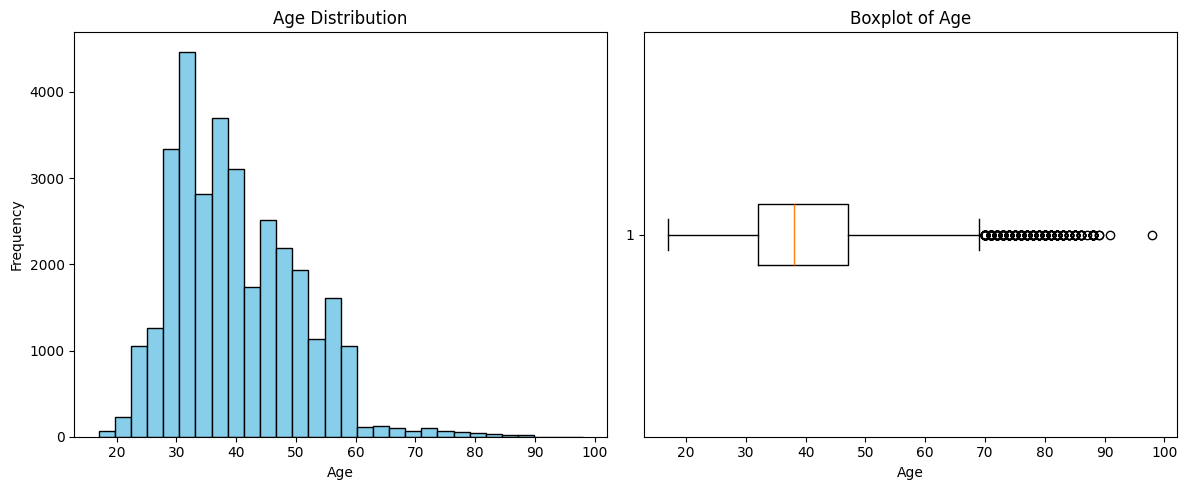

In [65]:
import matplotlib.pyplot as plt

# Plot histogram and boxplot for 'age' column to visualize distribution and outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axes[0].hist(portuguese_banking_df['age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(portuguese_banking_df['age'], vert=False)
axes[1].set_title('Boxplot of Age')
axes[1].set_xlabel('Age')

plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for modelling

# Drop rows with missing values (if any)
modelling_df = portuguese_banking_df.dropna()

# Select features (excluding 'y', which is the target)
X = modelling_df.drop('y', axis=1)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = modelling_df['y'].map({'yes': 1, 'no': 0})

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (32950, 48)
Target vector shape: (32950,)


In [72]:
## Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9004552352048558

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5798
           1       0.66      0.35      0.46       792

    accuracy                           0.90      6590
   macro avg       0.79      0.66      0.70      6590
weighted avg       0.89      0.90      0.89      6590



d:\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# Initialize the LGBMClassifier with some example parameters
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(lgbm, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112671 -> initscore=-2.063747
[LightGBM] [Info] Start training from score -2.063747
[LightGBM] [Info] Number of positive: 2970, number of negative: 23390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 46
[LightGBM] [Info] [bin

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# LightGBM
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
print("\nLightGBM Results:")
print("Accuracy:", accuracy_score(y_test, lgbm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_pred))
print("Classification Report:\n", classification_report(y_test, lgbm_pred))

Logistic Regression Results:
Accuracy: 0.9010622154779969
Confusion Matrix:
 [[5655  143]
 [ 509  283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5798
           1       0.66      0.36      0.46       792

    accuracy                           0.90      6590
   macro avg       0.79      0.67      0.71      6590
weighted avg       0.89      0.90      0.89      6590

[LightGBM] [Info] Number of positive: 2920, number of negative: 23440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110774 -> initscore=-2.082860
[LightGBM] [Info] Start training from score